In [20]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from datetime import timedelta
from io import BytesIO
import io
from playsound import playsound

In [19]:
def three_most_expensive_purchases():
    """Три самые дорогие покупки
    :return: сумму трех самых дорогих покупок
    """

    file_path = r"D:\DISTR\Загрузки\task_2.txt"

    # todo Здесь нужно написать код
    purchase = []
    with open(file_path) as file:
        purchase = file.read().split('\n\n')
        purchase = [sum(map(int, p.split())) for p in purchase]

    return sum(sorted(purchase)[-3:])

three_most_expensive_purchases()

202346

In [60]:
import requests as req
from bs4 import BeautifulSoup as BS


headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.51 Safari/537.36'
}


class GetHtml:
    def __get__(self, resp, _):
        return BS(resp.text, 'lxml')


req.Response.html = GetHtml()
ses = req.Session()
ses.headers = headers

In [61]:
resp = ses.post(
    "https://advert-api.wb.ru/adv/v2/fullstats",
    data=[
        {"id": 8960367, "dates": ["2023-10-07", "2023-10-06"]},
        {"id": 9876543, "dates": ["2023-10-07", "2023-12-06"]},
    ],
)


In [64]:
import statsmodels.api as sm
import numpy as np

In [85]:
X1 = [1,2,4,6,7]
X2 = [1,5,2,7,5]
y = [6,3,9,3,6]

X = sm.add_constant(np.array([X1, X2]).T)

model = sm.OLS(y, X).fit()

In [82]:
# Записать в стандартной форме
model.params

array([ 7.35652174,  0.7826087 , -1.27173913])

$\hat y = 7.357 + 0.78 \cdot X_1 - 1.27 \cdot X_2$

In [83]:
# Проверить общую статистическую значимость
# Проверить статистическую значимость параметров
#! Сравниваем P-value с 0.05, если меньше - то значимо
model.summary2()

c:\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.817  
Dependent Variable: y                AIC:                16.3256
Date:               2023-12-25 21:28 BIC:                15.1539
No. Observations:   5                Log-Likelihood:     -5.1628
Df Model:           2                F-statistic:        9.915  
Df Residuals:       2                Prob (F-statistic): 0.0916 
R-squared:          0.908            Scale:              1.1543 
------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
------------------------------------------------------------------
const     7.3565     1.0650    6.9074   0.0203    2.7741   11.9389
x1        0.7826     0.2744    2.8523   0.1041   -0.3979    1.9632
x2       -1.2717     0.2856   -4.4531   0.0469   -2.5005   -0.0430
----------------------------------------------------------------
Omnibus:               nan         Durbin-Watson:          1.580
Prob(Omnibus):         nan         Jarque-Bera (JB):       0.393
Skew:                  0.318       Prob(JB):               0.822
Kurtosis:              1.783       Condition No.:          14   
================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [88]:
# Проверка на гетероскедастичность

# Тест Гольдфельда-Квандта
from statsmodels.stats.diagnostic import het_goldfeldquandt
test_statistic, p_value, _ = het_goldfeldquandt(model.resid, X)
# p_value < 0.05 -> Есть гетероскедастичность
print(test_statistic, p_value)

nan nan


Эмм.. не работает, пробуем другой

In [93]:
# Тест Бреуша-Пагана
from statsmodels.stats.diagnostic import het_breuschpagan

# p_value < 0.05 -> Есть гетероскедастичность
het_breuschpagan(model.resid, X)[1]
p_value

0.12080217301774476

In [84]:
# Проверка на автокорреляцию

# Тест Дарбина-Уотсона
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

1.5797715549005191

Значение ближе к 2-м, автокореляции нет

In [112]:
# Построение точечного прогноза

X_= [[1, 3, 7]]
# Первая единица, константа
model.predict(X_)

array([0.80217391])

In [113]:
# Построение интервального прогноза

model.get_prediction(X_).conf_int()

array([[-4.18092582,  5.78527364]])

In [15]:
fp = Path("./music.mp3")
signal, sampling_rate = sf.read(fp)
print(signal, sampling_rate)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]] 44100


In [ ]:
sec = 5
music = np.zeros(sampling_rate*sec)

In [17]:
sf.info("./music.mp3")

./music.mp3
samplerate: 44100 Hz
channels: 2
duration: 04:35.456 min
format: MPEG-1/2 Audio [MP3]
subtype: MPEG Layer III [MPEG_LAYER_III]

In [54]:
class Song:
    def __init__(self, file=5, sampling_rate=44100) -> None:
        if isinstance(file, str):
            self.signal, self.sampling_rate = sf.read(file)
        else:
            self.sampling_rate = sampling_rate
            self.signal = np.zeros([file * sampling_rate, 2])
        self.len = len(self.signal) / self.sampling_rate

    def save(self, path):
        sf.write(path, self.signal, self.sampling_rate)

    def play(self):
        sf.write("temp.mp3", self.signal, self.sampling_rate)
        playsound("temp.mp3")

    def __repr__(self):
        return f"samplerate: {self.sampling_rate} Hz\nchannels: {self.signal.shape[1]}\nduration: {timedelta(seconds=self.signal.shape[0] / self.sampling_rate)}"


Song("./music.mp3").play()



    Error 263 for command:
        open temp.mp3
    Указанное устройство не открыто или не опознается интерфейсом MCI.

    Error 263 for command:
        close temp.mp3
    Указанное устройство не открыто или не опознается интерфейсом MCI.
Failed to close the file: temp.mp3


PlaysoundException: 
    Error 263 for command:
        open temp.mp3
    Указанное устройство не открыто или не опознается интерфейсом MCI.

In [55]:
playsound("music.mp3")


    Error 259 for command:
        play music.mp3 wait
    Указанный параметр команды не распознан драйвером.

    Error 263 for command:
        close music.mp3
    Указанное устройство не открыто или не опознается интерфейсом MCI.
Failed to close the file: music.mp3


PlaysoundException: 
    Error 259 for command:
        play music.mp3 wait
    Указанный параметр команды не распознан драйвером.

In [57]:
import numpy as np
import simpleaudio as sa

frequency = 440  # Our played note will be 440 Hz
fs = 44100  # 44100 samples per second
seconds = 3  # Note duration of 3 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)

# Generate a 440 Hz sine wave
note = np.sin(frequency * t * 2 * np.pi)

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
# Convert to 16-bit data
audio = audio.astype(np.int16)

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, fs)

# Wait for playback to finish before exiting
play_obj.wait_done()

ModuleNotFoundError: No module named 'simpleaudio'

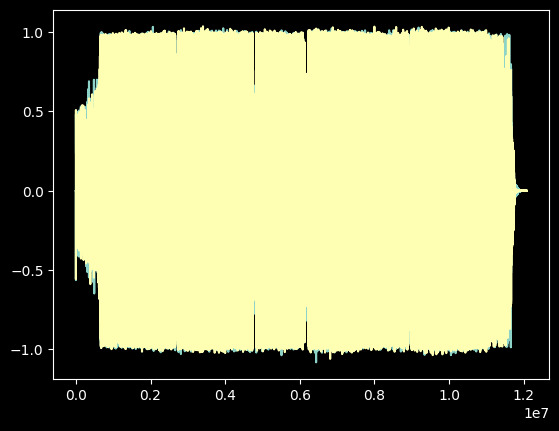

In [16]:
start = np.where((signal > 0).any(axis=1))[0][0]
plt.plot(signal[start:])

In [ ]:
music = np.zeros()

In [112]:
start = int(signal.shape[0]/274*30)

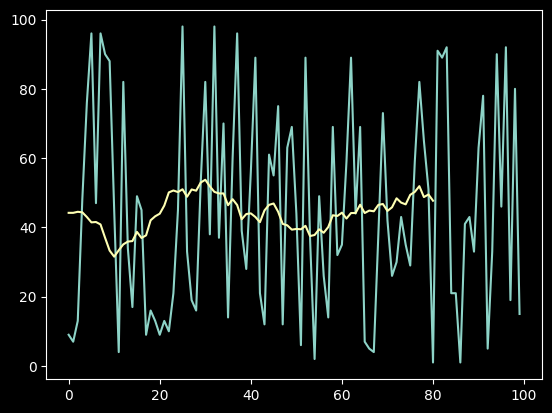

In [135]:
def smooth(data, step=10):
    new_data = []
    for i in range(len(data) - step + 1):
        new_data.append(np.mean(data[i:i+step]))
    return new_data

d = np.random.randint(0, 100, 100)
plt.plot(d)
plt.plot(smooth(d, 20))

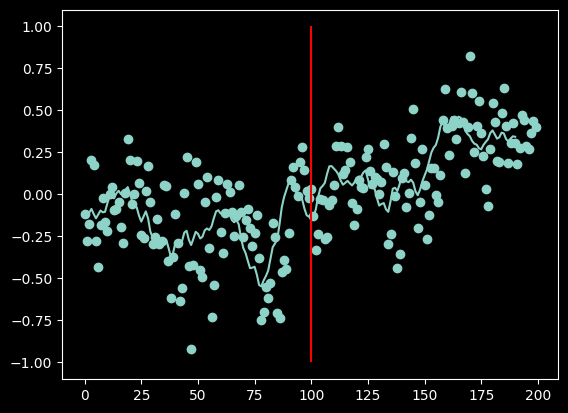

In [157]:
data = signal[start-100:start+100][:, 0]
plt.scatter(np.arange(data.shape[0]), data)
plt.plot(smooth(data, 10))
plt.vlines(len(data)//2, -1, 1, 'r')

In [189]:
len(set(signal[pos:, 0]))

11215602

In [198]:
signal.shape[0] / sampling_rate

274.5208163265306

In [207]:
from datetime import timedelta
print(timedelta(seconds=signal.shape[0] / sampling_rate))

0:04:34.520816


In [191]:
signal.shape[0] - pos

12087166

In [104]:
song = signal.copy()
song = song[start:]
# song[:, 0] = song[:, 0] * -1
sf.write("./song.mp3", song, sampling_rate)

In [100]:
4*60+34

274